Case Summary<a href="#Case-Summary" class="anchor-link">¶</a>
-------------------------------------------------------------

East-West Airlines is trying to learn more about its customers. Key
issues are their flying patterns, earning and use of frequent flyer
rewards, and use of the airline credit card. The task is to identify
customer segments via clustering. The file EastWestAirlines.xls contains
information on 4000 passengers who belong to an airline’s frequent flier
program. For each passenger the data include information on their
mileage history and on different ways they accrued or spent miles in the
last year. **The goal is to try to identify clusters of passengers that
have similar charactersitics for the purpose of targeting different
segments for different types of mileage offers.**

Please prepare a notebook including answers to each of the following
questions:

1.  Apply hierarchical clustering with Euclidean distance and complete
    linkage. How many clusters appear to be appropriate? (***25
    points***)

2.  Compare the cluster centroids to characterize the different clusters
    and try to give each cluster a label. (***20 points***)

3.  To check the stability of the clusters, remove a random 5% of the
    data (by taking a random sample of 95% of the records, namely 200
    records), and repeat the analysis. Does the same picture emerge? Use
    425 as the seed. (***10 points***)

4.  Use k-means algorithm with the number of clusters you found in part
    (a). Does the same picture emerge? (***25 points***)

5.  Which clusters would you target for offers, and what type of offers
    would you target to customers in that cluster? (***20 points***)

Below we provided you with a list of libraries that might be useful for
your case study. This list is only a sample of what you might need; you
are free to use any additional library serving your purpose.

**The homework is due Sunday, October 23 midnight.**

Data Description<a href="#Data-Description" class="anchor-link">¶</a>
---------------------------------------------------------------------

-   **Field Name**=ID\#; **Data Type**=NUMBER; **Description**=Unique ID

-   **Field Name**=Balance; **Data Type**=NUMBER; **Description**=Number
    of miles eligible for award travel

-   **Field Name**=Qual\_miles; **Data Type**=NUMBER;
    **Description**=Number of miles counted as qualifying for Topflight
    status

-   **Field Name**=cc1\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with freq. flyer credit card
    in the past 12 months:

-   **Field Name**=cc2\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with Rewards credit card in
    the past 12 months:

-   **Field Name**=cc3\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with Small Business credit
    card in the past 12 months:

-   For cc1\_miles,cc2\_miles and cc3\_miles bins mean following ranges:

          - 1 = under 5,000
          - 2 = 5,000 - 10,000
          - 3 = 10,001 - 25,000
          - 4 = 25,001 - 50,000
          - 5 = over 50,000

-   **Field Name**=Bonus\_miles; **Data Type**=NUMBER;
    **Description**=Number of miles earned from non-flight bonus
    transactions in the past 12 months

-   **Field Name**=Bonus\_trans; **Data Type**=NUMBER;
    **Description**=Number of non-flight bonus transactions in the past
    12 months

-   **Field Name**=Flight\_miles\_12mo; **Data Type**=NUMBER;
    **Description**=Number of flight miles in the past 12 months

-   **Field Name**=Flight\_trans\_12; **Data Type**=NUMBER;
    **Description**=Number of flight transactions in the past 12 months

-   **Field Name**=Days\_since\_enroll; **Data Type**=NUMBER;
    **Description**=Number of days since Enroll\_date

-   **Field Name**=Award?; **Data Type**=NUMBER; **Description**=Dummy
    variable for Last\_award (1=not null, 0=null)

# Sample Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn import preprocessing   #package for normalize
from sklearn.metrics import silhouette_score 

# Get Data

In [48]:
data=pd.read_excel('EastWestAirlines.xls',sheet_name='data')

In [3]:
data.head(5)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [5]:
data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

# Question 1

We know how critical outliers are for clustering. So let's observe and clean out the outliers with the boxplot.
Let's see the outliers of all our columns using `sns.boxplot` inside the for loop.

In [6]:
data_keys = list(data.keys())

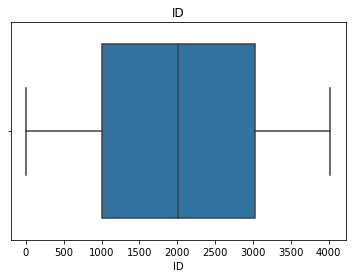

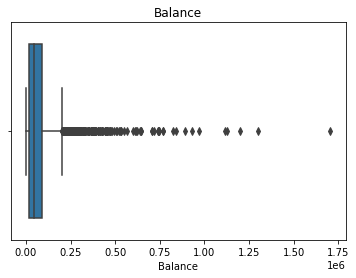

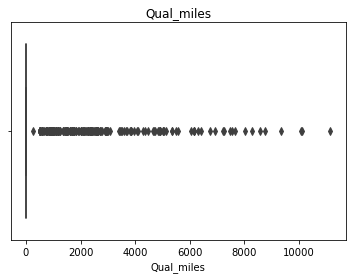

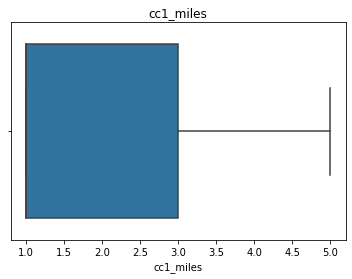

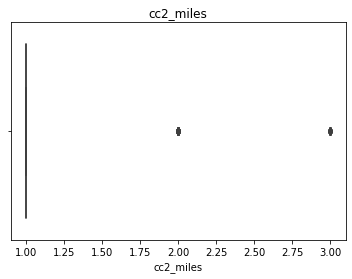

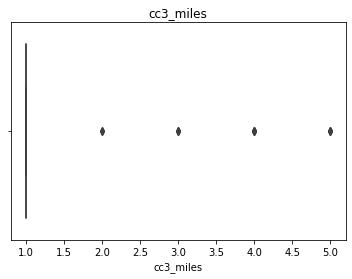

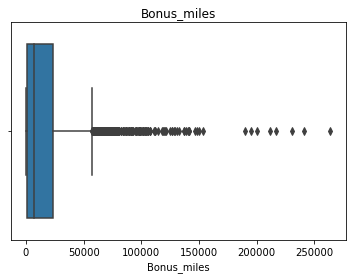

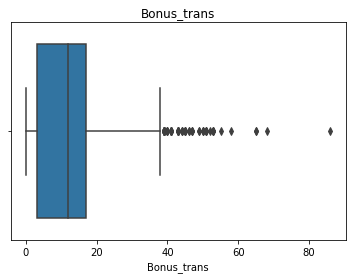

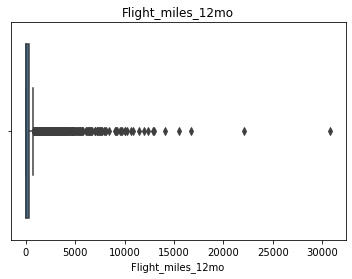

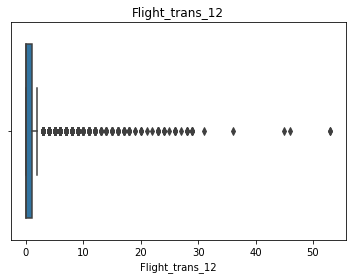

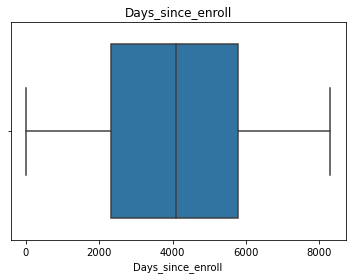

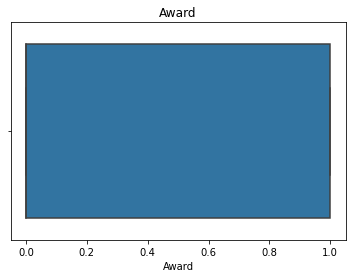

In [7]:
for i in data_keys:
    sns.boxplot(x=i, data=data)
    plt.title(i)
    plt.show()

Looking at the charts, I thought it would make sense to remove the outliers of the `Balance` , `Bonus_miles` , `Flight_miles_12mo` , `Bonus_trans` columns. `Qual_miles` was also in this list, but it contains too many outliers to remove, so I didn't add it to the loop.

In [8]:
for i in ['Balance','Bonus_miles','Flight_miles_12mo','Bonus_trans']:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5*IQR
    ust_sinir = Q3 + 1.5*IQR
    df = data[(data[i]>alt_sinir) & (data[i]<ust_sinir)]
    data = df

In [9]:
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1


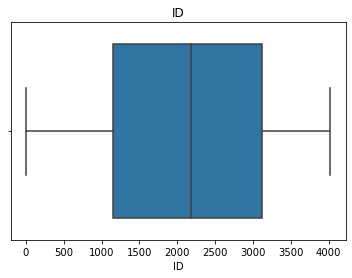

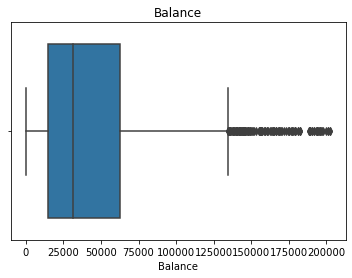

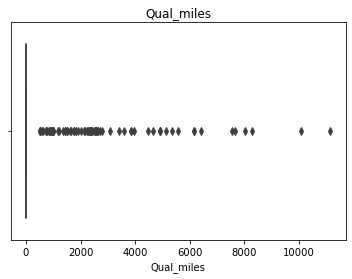

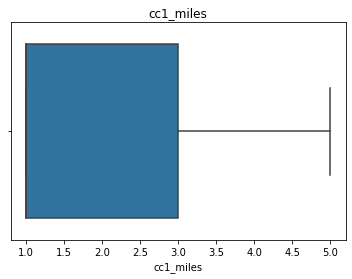

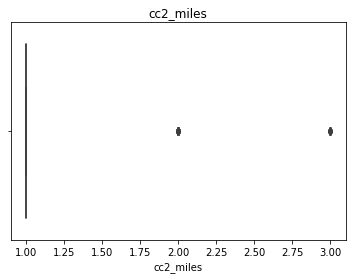

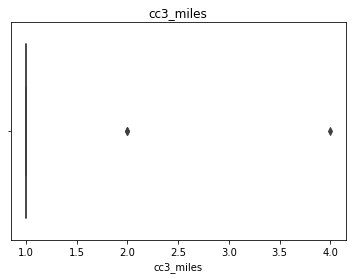

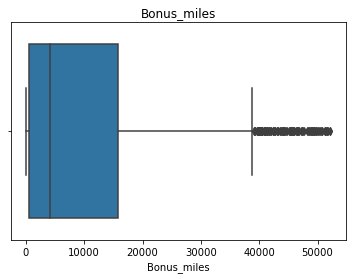

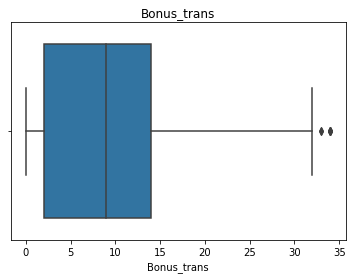

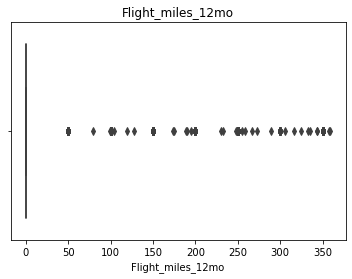

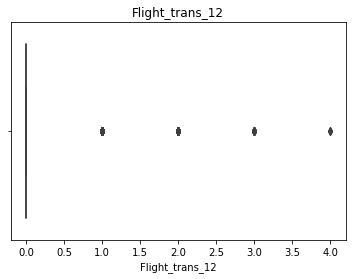

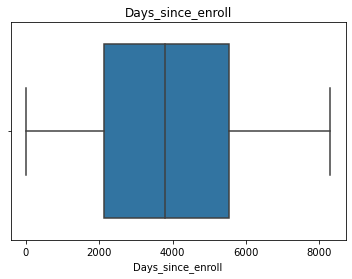

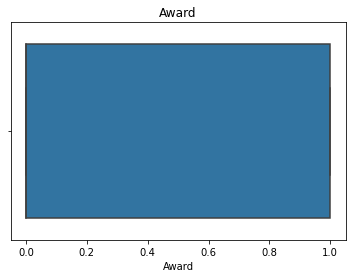

In [70]:
data_keys2 = list(df.keys())
for i in data_keys2:
    sns.boxplot(x=i, data=df)
    plt.title(i)
    plt.show()

In [14]:
df.drop(["ID","Award"],axis=1,inplace=True)

In [15]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942
...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402


In [17]:
df_normalized = preprocessing.normalize(df)
print(df_normalized)

[[9.70414393e-01 0.00000000e+00 3.44815547e-05 ... 0.00000000e+00
  0.00000000e+00 2.41370883e-01]
 [9.40208573e-01 0.00000000e+00 4.88572320e-05 ... 0.00000000e+00
  0.00000000e+00 3.40437193e-01]
 [9.81113099e-01 0.00000000e+00 2.37247449e-05 ... 0.00000000e+00
  0.00000000e+00 1.66879855e-01]
 ...
 [9.99649387e-01 0.00000000e+00 1.55261223e-05 ... 0.00000000e+00
  0.00000000e+00 2.16589407e-02]
 [9.44947533e-01 0.00000000e+00 3.85184532e-05 ... 0.00000000e+00
  0.00000000e+00 1.80009571e-02]
 [9.07271293e-01 0.00000000e+00 3.00819394e-04 ... 0.00000000e+00
  0.00000000e+00 4.20545513e-01]]


In [20]:
a = linkage(df_normalized, method = "complete", metric = "euclidean")

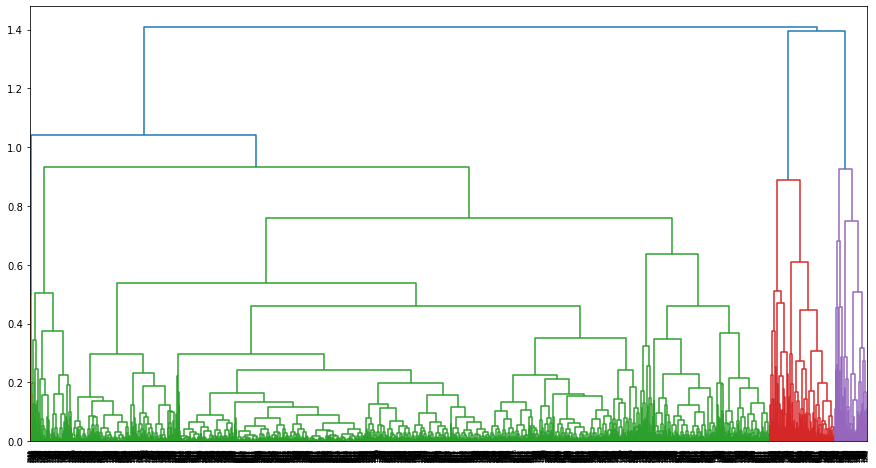

In [23]:
plt.figure(figsize=(15, 8))
dendrogram(a)
plt.show()

The seperation in Complete Method indicate that 4 is the optimal number for clusters.

In [24]:
hierarchical_clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'complete', affinity = "euclidean").fit(df_normalized) 
hierarchical_clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
cluster_labels = pd.Series(hierarchical_clustering.labels_)

We add the `clusters` column to the dataframe as a new column to see the cluster where each row is located.

In [31]:
df['clusters'] = cluster_labels

In [34]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0.0
1,19244,0,1,1,1,215,2,0,0,6968,0.0
2,41354,0,1,1,1,4123,4,0,0,7034,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0.0
5,16420,0,1,1,1,0,0,0,0,6942,0.0


Our clustering score is not very good I will explain why in question 2.

In [64]:
print("Clustering Score:", (silhouette_score(df_normalized, hierarchical_clustering.labels_)*100).round(3))

Clustering Score: 51.566


# Question 2

Let's show the average values for each column of the customers covered by our 4 clusters with the `groupby()` function.

Let's label our clusters and create a new dataframe to examine them. I chose the method of looking at their mean to compare the center points.

In [86]:
w = df.iloc[:, 0:].groupby(df.clusters).mean()
w

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters
clusters,,,,,,,,,,,
0.0,51326.406780,80.859385,1.903327,1.015066,1.000628,11410.512869,9.649718,20.088512,0.129944,5017.913371,0.0
1.0,59276.349206,86.460317,2.126984,1.000000,1.000000,12905.936508,10.047619,14.285714,0.142857,5608.825397,1.0
2.0,46230.268116,86.268116,1.724638,1.014493,1.000000,10053.398551,9.507246,26.449275,0.202899,5144.376812,2.0
3.0,41899.600000,200.000000,1.400000,1.000000,1.000000,6113.000000,4.600000,30.000000,0.200000,4204.400000,3.0


0 ==> The second most winning group of cards and the third most flying customer group. (Silver member)

1 ==> The group of customers who earn the most from cards and fly most often. (Diamond member)

2 ==> The customer group that is the second in the third frequency of flights on the cards. (Gold member)

3 ==> The group that won the least and flew the least. (Bronze member)

In [45]:
cluster1 = pd.DataFrame(df.loc[df.clusters==0].mean(),columns= ['silver_customer'])
cluster2 = pd.DataFrame(df.loc[df.clusters==1].mean(),columns= ['diamond_customer'])
cluster3 = pd.DataFrame(df.loc[df.clusters==2].mean(),columns= ['gold_customer'])
cluster4 = pd.DataFrame(df.loc[df.clusters==3].mean(),columns= ['bronze_customer'])

In [46]:
average_cluster_df = pd.concat([cluster1,cluster2,cluster3,cluster4],axis=1)
average_cluster_df

,silver_customer,diamond_customer,gold_customer,bronze_customer
Balance,51326.406780,59276.349206,46230.268116,41899.6
Qual_miles,80.859385,86.460317,86.268116,200.0
cc1_miles,1.903327,2.126984,1.724638,1.4
cc2_miles,1.015066,1.000000,1.014493,1.0
cc3_miles,1.000628,1.000000,1.000000,1.0
Bonus_miles,11410.512869,12905.936508,10053.398551,6113.0
Bonus_trans,9.649718,10.047619,9.507246,4.6
Flight_miles_12mo,20.088512,14.285714,26.449275,30.0
Flight_trans_12,0.129944,0.142857,0.202899,0.2
Days_since_enroll,5017.913371,5608.825397,5144.376812,4204.4


When we look at how many elements each set has, we see that too many elements accumulate in a set.

This is the reason why our clustering score is not good.

In [38]:
df.groupby(['clusters']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clusters,,,,,,,,,,
0.0,1593,1593,1593,1593,1593,1593,1593,1593,1593,1593
1.0,63,63,63,63,63,63,63,63,63,63
2.0,138,138,138,138,138,138,138,138,138,138
3.0,5,5,5,5,5,5,5,5,5,5


# Question 3

In [51]:
new_df = df.drop(['clusters'],axis=1)
new_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942
...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402


In [54]:
new_df.shape

(2744, 10)

5 percent of rows:

In [55]:
2744/20

137.2

Our new dataset with 5% removed:

In [56]:
np.random.seed(425)
n_remove = 137
drop_n = np.random.choice(new_df.index, n_remove, replace=False)
df_95_percent = new_df.drop(drop_n)
df_95_percent

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942
...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402


Let's apply the same operations as in the question to our 95 percent data.

In [57]:
new_df_normalized = preprocessing.normalize(df_95_percent)
print(new_df_normalized)

[[9.70414393e-01 0.00000000e+00 3.44815547e-05 ... 0.00000000e+00
  0.00000000e+00 2.41370883e-01]
 [9.40208573e-01 0.00000000e+00 4.88572320e-05 ... 0.00000000e+00
  0.00000000e+00 3.40437193e-01]
 [9.81113099e-01 0.00000000e+00 2.37247449e-05 ... 0.00000000e+00
  0.00000000e+00 1.66879855e-01]
 ...
 [9.99649387e-01 0.00000000e+00 1.55261223e-05 ... 0.00000000e+00
  0.00000000e+00 2.16589407e-02]
 [9.44947533e-01 0.00000000e+00 3.85184532e-05 ... 0.00000000e+00
  0.00000000e+00 1.80009571e-02]
 [9.07271293e-01 0.00000000e+00 3.00819394e-04 ... 0.00000000e+00
  0.00000000e+00 4.20545513e-01]]


In [58]:
b = linkage(new_df_normalized, method = "complete", metric = "euclidean")

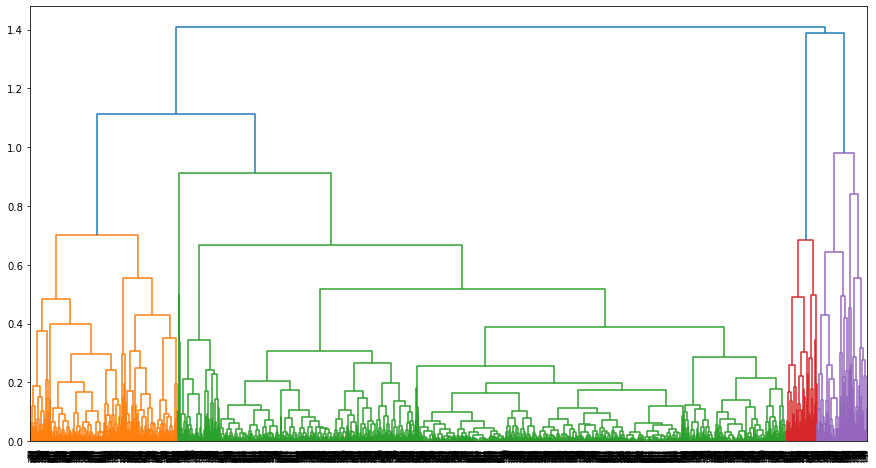

In [59]:
plt.figure(figsize=(15, 8))
dendrogram(b)
plt.show()

In [60]:
new_hierarchical_clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'complete', affinity = "euclidean").fit(new_df_normalized) 
new_hierarchical_clustering.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [63]:
print("Clustering Score:", (silhouette_score(new_df_normalized, new_hierarchical_clustering.labels_)*100).round(3))

Clustering Score: 49.674


Our previous Clustering Score was 51.566

So, with a new Clustering Score of 49.674, we have a similar but a slightly worse image overall.

# Question 4

After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

1. Centroids of newly formed clusters do not change
2. Points remain in the same cluster
3. Maximum number of iterations are reached

In [65]:
kmeans = KMeans(n_clusters = 4, max_iter=50)
kmeans.fit(df_normalized)

KMeans(max_iter=50, n_clusters=4)

In [74]:
kmeans_cluster_labels = pd.Series(kmeans.labels_)
new_df['kmeans_clusters'] = kmeans_cluster_labels

In [76]:
new_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,kmeans_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0.0
1,19244,0,1,1,1,215,2,0,0,6968,0.0
2,41354,0,1,1,1,4123,4,0,0,7034,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0.0
5,16420,0,1,1,1,0,0,0,0,6942,3.0


In [83]:
z = new_df.iloc[:, 0:].groupby(new_df.kmeans_clusters).mean()
z

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,kmeans_clusters
kmeans_clusters,,,,,,,,,,,
0.0,51313.378430,63.522233,1.902554,1.012299,1.000946,11446.674551,9.669820,17.925260,0.119205,4982.892148,0.0
1.0,47078.290076,76.786260,1.702290,1.007634,1.000000,9484.358779,9.198473,28.244275,0.213740,5111.580153,1.0
2.0,52480.454545,74.768595,1.917355,1.016529,1.000000,11388.256198,8.768595,13.842975,0.123967,5656.479339,2.0
3.0,51695.957143,124.310204,1.928571,1.020408,1.000000,11608.959184,9.904082,25.263265,0.155102,5014.020408,3.0


We can see that the distribution of set elements makes more sense.

In [78]:
new_df.groupby(['kmeans_clusters']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
kmeans_clusters,,,,,,,,,,
0.0,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057
1.0,131,131,131,131,131,131,131,131,131,131
2.0,121,121,121,121,121,121,121,121,121,121
3.0,490,490,490,490,490,490,490,490,490,490


Let's look at the properties of the newly created sets with `sns.barplot()`.

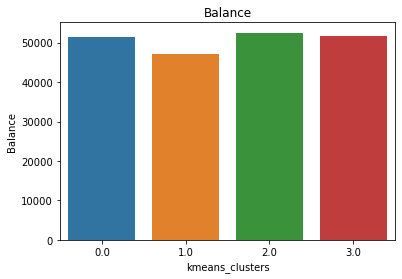

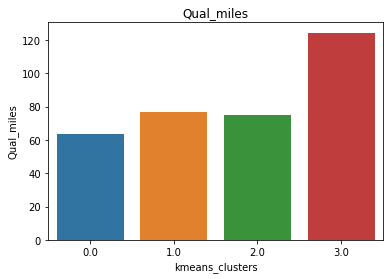

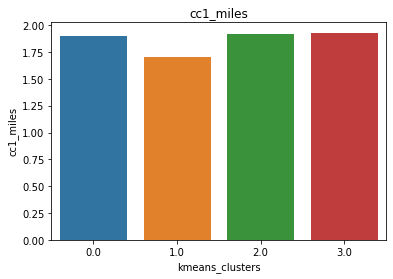

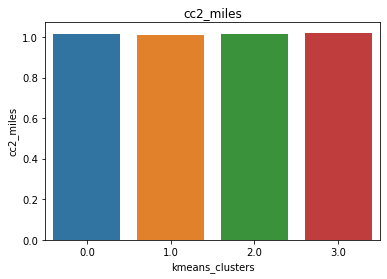

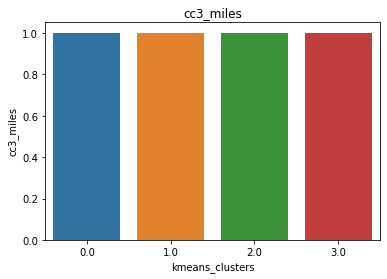

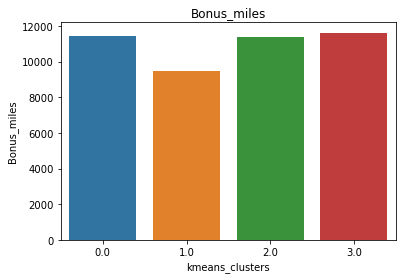

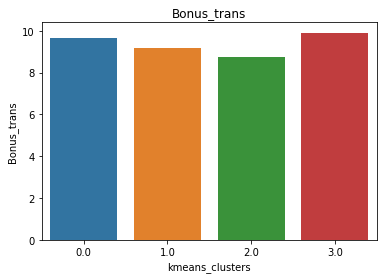

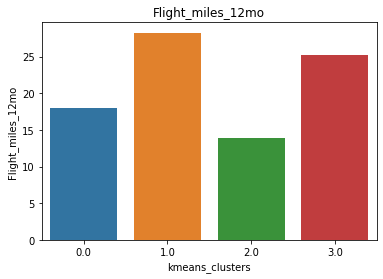

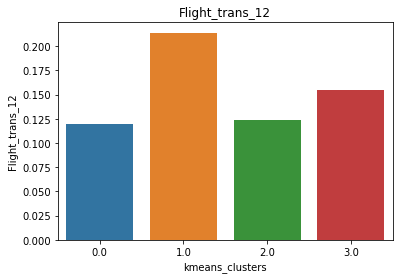

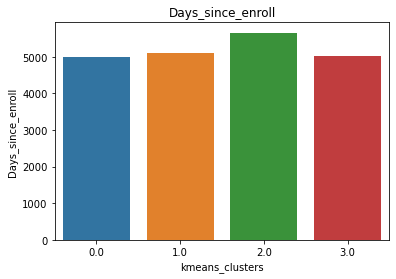

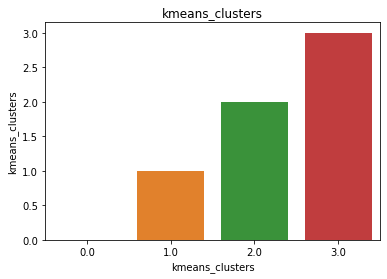

In [84]:
for i in list(z.keys()):
    sns.barplot(data=z,x='kmeans_clusters',y=i)
    plt.title(i)
    plt.show()

3 ==> The second most winning group of cards and the third most flying customer group. (Silver member)

2 ==> The group of customers who earn the most from cards and fly most often. (Diamond member)

0 ==> The last in the third frequency of flights on the cards is the customer group. (Bronze member)

1 ==> The group that won the least and flew the second most. (Gold member)

K Means seems to be more successful in division of clusters.

# Question 5

Let's look at the graphed form of the clusters we obtained in the first question, as we did in kmeans.

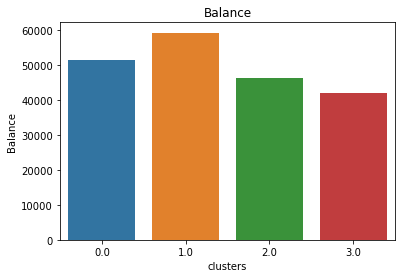

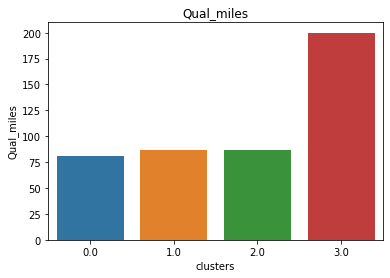

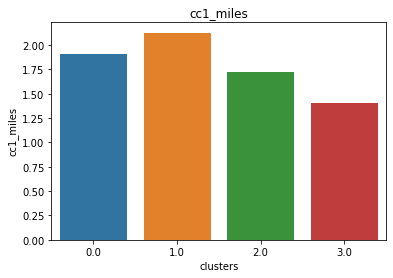

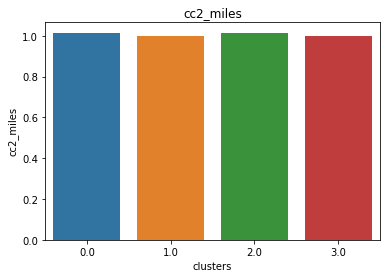

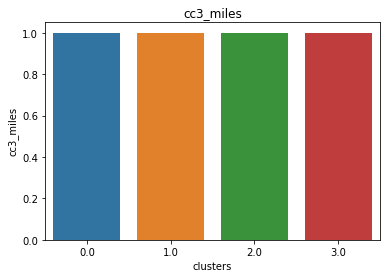

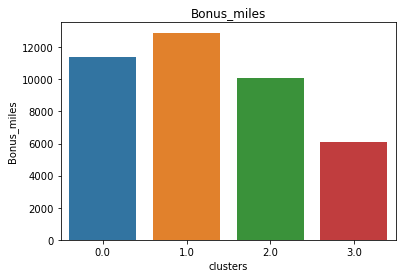

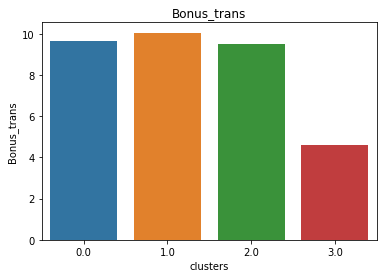

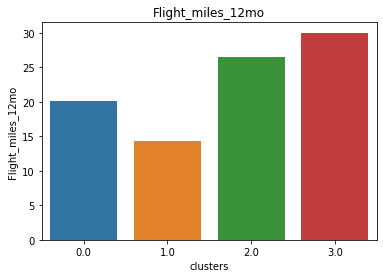

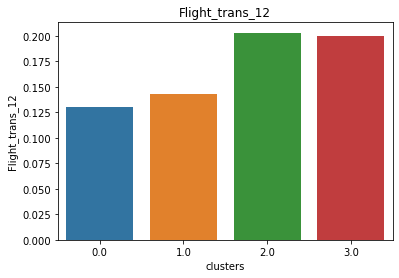

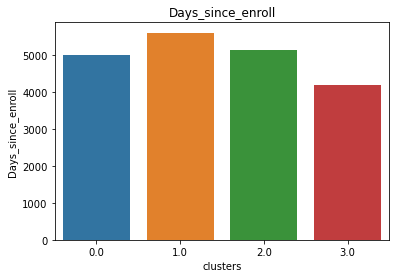

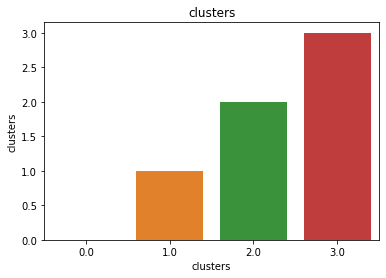

In [87]:
for i in list(w.keys()):
    sns.barplot(data=w,x='clusters',y=i)
    plt.title(i)
    plt.show()

This airline company should treat its diamond customers, who are number 1 in the 2 complete linkage method in the kmeans method, more privileged.(`Diamond customer`) Because they are the customers of this company who fly the most and spend their cards.

In addition, more attractive offers and campaigns should be made to win `Bronze customers`. Also, this cluster contains the largest number of people.

`Silver customers` rank 2nd in card usage, only flying less frequently. To encourage spending these saved miles, we may offer these passengers discounts on first-class seats. Passengers will then have an incentive to travel and enjoy first class travel and spend their earned miles, which will benefit the airline and create a win-win situation.

`Gold members` fly more, but their spending with cards is low. Since they fly in large numbers, if we deliver advertisements to these customers where we can show the contribution of card usage to their flight budget, they will increase card usage.